Automatically created module for IPython interactive environment


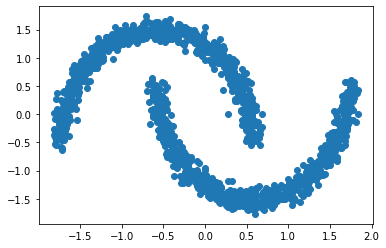

In [1]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)
n_samples =1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
plot_num = 1
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
datasets = [(noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2})]
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:,0], X[:,1])
    plt.show()

(1500, 2) (1500,)
[[-1.01321277  1.39018434]
 [ 0.49983903 -0.1921052 ]
 [ 1.78569142  0.5003038 ]
 [ 0.51636245 -0.17467749]
 [ 1.73081934 -0.13199568]]
[0 0 1 0 1]
(750, 2) (750, 2)
0.5 0.5
-0.5769059648780953 0.8156968251060293
0.7771564481569982 0.6234133359582833
0.576905964878097 0.817922798855792
-0.777156448156998 0.6351468513071304


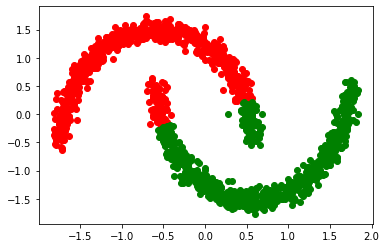

In [2]:
import numpy as np
import scipy
# example of generating a small classification dataset
#from sklearn.datasets import make_blobs
# generate 2d classification dataset
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

def fit_distribution(data):
	# estimate parameters
	mu = np.mean(data)
	sigma = np.std(data)
	print(mu, sigma)
	# fit distribution
	dist = scipy.stats.norm(mu, sigma)
	return dist

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

z=[]
a1=[]
a2=[]
for i in range(0,1500):
    Xsample = X[i]
    py0 = probability(Xsample, priory0, distX1y0, distX2y0)
    py1 = probability(Xsample, priory1, distX1y1, distX2y1)
    if py0 > py1:
        a1.append(Xsample)
        z.append(0)
    elif py1>py0:
        a2.append(Xsample)
        z.append(1)
z=np.array(z)
a1=np.array(a1)
a2=np.array(a2)
z.shape
plt.scatter(a1.T[0],a1.T[1],label='Class1',color='red',marker='o')
plt.scatter(a2.T[0],a2.T[1],label='Class1',color='green',marker='o')

Automatically created module for IPython interactive environment


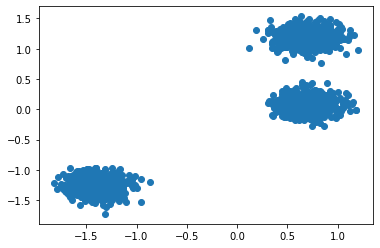

In [3]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)
n_samples =1500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
plot_num = 1
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
datasets = [(blobs, {})]
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:,0], X[:,1])
    plt.show()
    

(1500, 2) (1500,)
[[0.43868549 1.0189435 ]
 [0.39707363 1.24042045]
 [0.66127051 1.30549689]
 [0.58547972 0.06381097]
 [0.79097615 0.18213045]]
[0 0 0 ... 0 2 2]
(500, 2) (500, 2)
0.3333333333333333 0.3333333333333333
0.7028550551214549 0.17284426228146485
1.1770118853250073 0.12457784730165046
0.6922927086293443 0.16129359663799975
0.07304493845292882 0.12431980936512842
[0 0 0 ... 0 1 1]


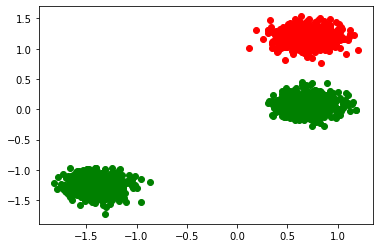

In [6]:
import numpy as np
import scipy
# example of generating a small classification dataset
#from sklearn.datasets import make_blobs
# generate 2d classification dataset
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:])

def fit_distribution(data):
	# estimate parameters
	mu = np.mean(data)
	sigma = np.std(data)
	print(mu, sigma)
	# fit distribution
	dist = scipy.stats.norm(mu, sigma)
	return dist

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

z=[]
a1=[]
a2=[]
for i in range(0,1500):
    Xsample = X[i]
    py0 = probability(Xsample, priory0, distX1y0, distX2y0)
    py1 = probability(Xsample, priory1, distX1y1, distX2y1)
    if py0 > py1:
        a1.append(Xsample)
        z.append(0)
    elif py1>py0:
        a2.append(Xsample)
        z.append(1)
z=np.array(z)
a1=np.array(a1)
a2=np.array(a2)
z.shape
print(z[:])
plt.scatter(a1.T[0],a1.T[1],label='Class1',color='red',marker='o')
plt.scatter(a2.T[0],a2.T[1],label='Class1',color='green',marker='o')